In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

In [6]:
data = pd.read_csv('voice.csv')
data_set=pd.DataFrame(data)
data_set.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
data_set.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


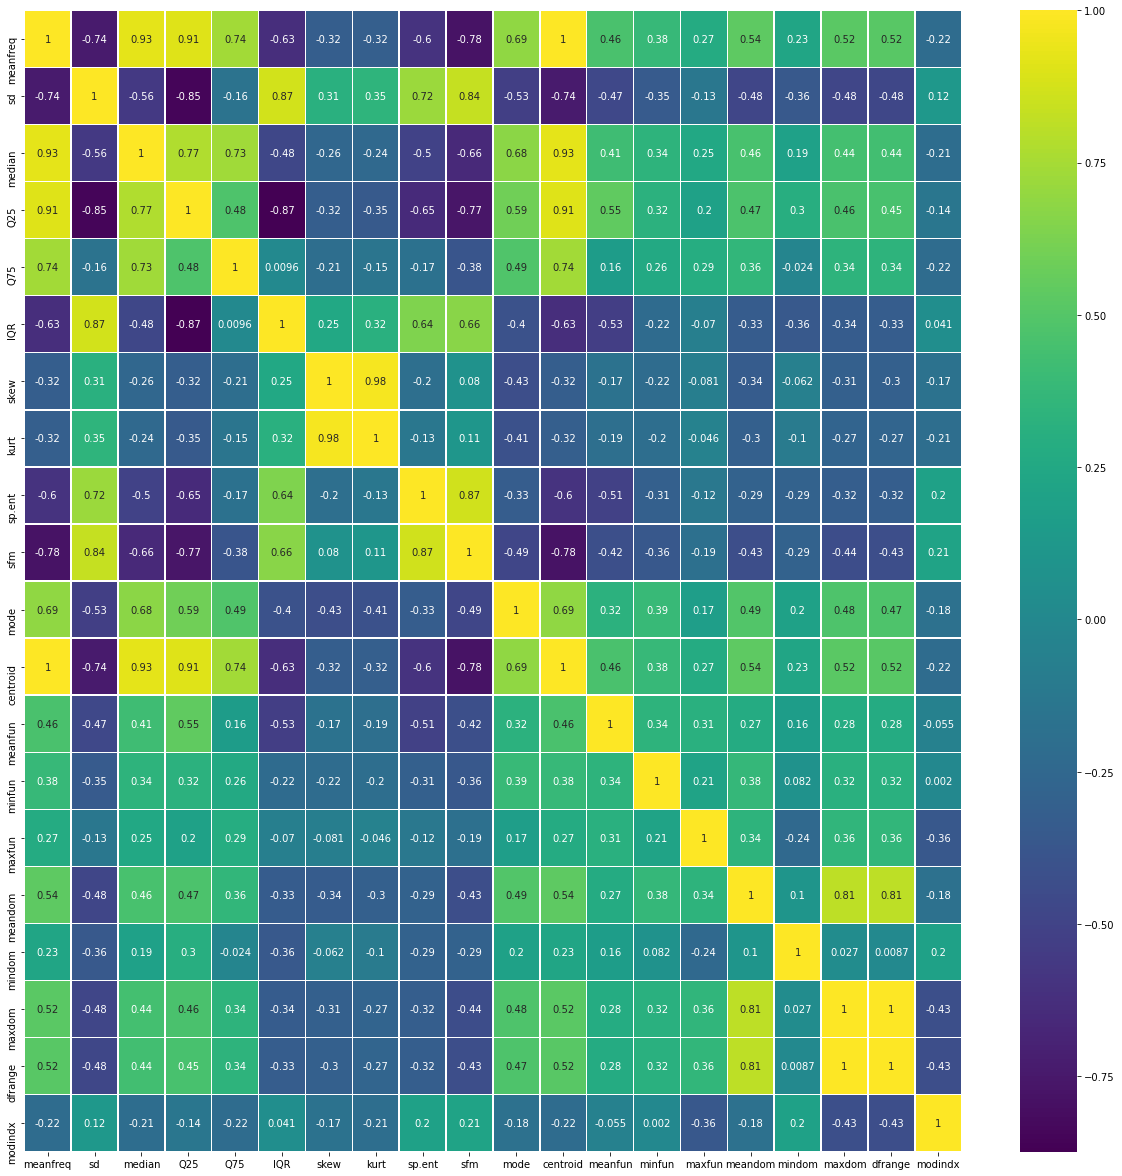

In [8]:
import seaborn
plt.figure(figsize=(21,21))
seaborn.heatmap(data_set.corr(),annot=True,cmap='viridis',linewidth=0.5)


In [9]:
new_data_set = data_set.drop(['sfm','kurt','meandom','meanfreq','dfrange','modindx'],axis=1)
new_data_set.head()

,sd,median,Q25,Q75,IQR,skew,sp.ent,mode,centroid,meanfun,minfun,maxfun,mindom,maxdom,label
0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,0.893369,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,male
1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,0.892193,0.000000,0.066009,0.107937,0.015826,0.250000,0.007812,0.054688,male
2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,0.846389,0.000000,0.077316,0.098706,0.015656,0.271186,0.007812,0.015625,male
3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,0.963322,0.083878,0.151228,0.088965,0.017798,0.250000,0.007812,0.562500,male
4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,0.971955,0.104261,0.135120,0.106398,0.016931,0.266667,0.007812,5.484375,male


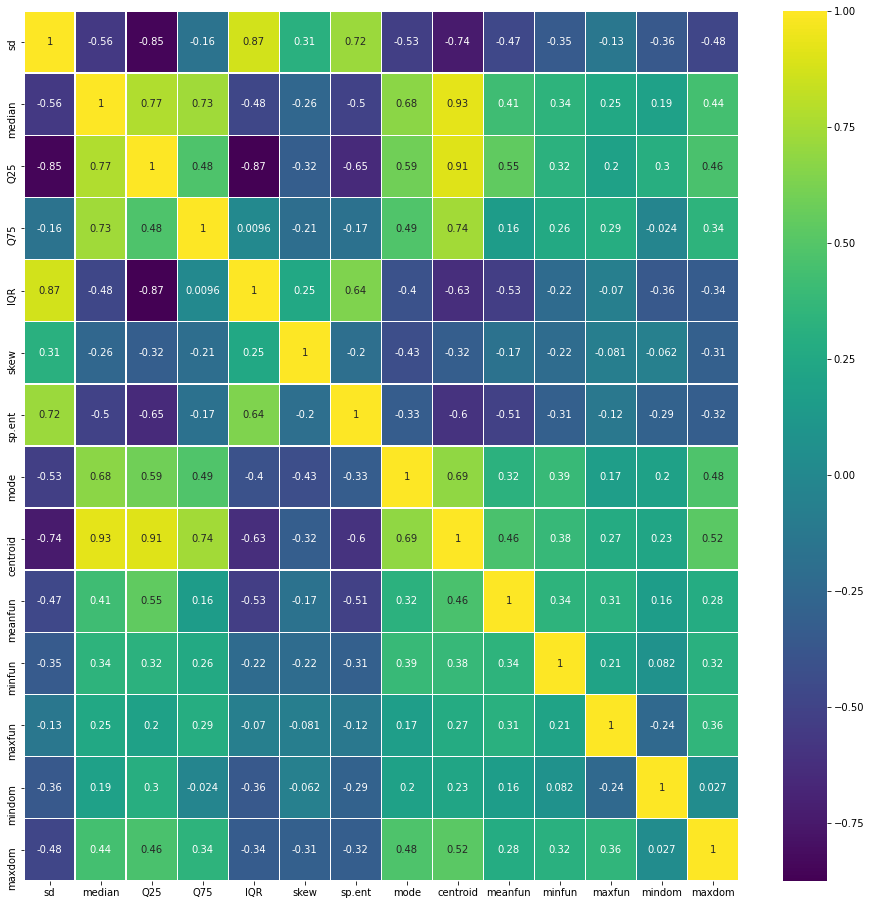

In [10]:
plt.figure(figsize=(16,16))
seaborn.heatmap(new_data_set.corr(),annot=True,cmap='viridis',linewidth=0.5)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(new_data_set.iloc[ : , : -1].values, new_data_set.iloc[ : ,  -1].values, test_size=0.2)

In [48]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'rbf')
classifier1.fit(X_train, y_train)
print('Using SVM classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier1.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier1.score(X_test,y_test)))

Using SVM classifier:
Accuracy of training set: 0.72
Accuracy of test set: 0.72


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)
print('Using K nearest Classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier2.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier2.score(X_test,y_test)))

Using K nearest Classifier:
Accuracy of training set: 0.85
Accuracy of test set: 0.77


In [13]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear')
classifier3.fit(X_train, y_train)
print('Using SVM classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier3.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier3.score(X_test,y_test)))

Using SVM classifier:
Accuracy of training set: 0.92
Accuracy of test set: 0.90


In [14]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf')
classifier4.fit(X_train, y_train)
print('Using kernel SVM classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier4.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier4.score(X_test,y_test)))

Using kernel SVM classifier:
Accuracy of training set: 0.72
Accuracy of test set: 0.72


In [15]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
print('Using Naive Bayes classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier5.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier5.score(X_test,y_test)))

Using Naive Bayes classifier:
Accuracy of training set: 0.93
Accuracy of test set: 0.94


In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy')
classifier6.fit(X_train, y_train)
print('Using Decision tree classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier6.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier6.score(X_test,y_test)))

Using Decision tree classifier:
Accuracy of training set: 1.00
Accuracy of test set: 0.95


In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators = 5)
classifier7.fit(X_train, y_train)
print('Using Random forest classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier7.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier7.score(X_test,y_test)))

Using Random forest classifier:
Accuracy of training set: 1.00
Accuracy of test set: 0.97


In [ ]:
0.05357212,0.2614669,0.2579606,0.2689803,0.01101968,4.031028,0.6977469,0.2599642,0.2490138,0.2329578,0.1729412,0.2791139,0,10.07754

In [ ]:
0.08182344,0.1206077,0.05029491,0.2099374,0.1596425,16.05662,0.9311203,0.05004468,0.1301362,0.2229511,0.1729412,0.2791139,0,0.6029297

In [56]:
features =  0.08002559,0.1643696,0.1163451,0.2474119,0.1310669,2.115133,0.9282573,0.09004594,0.1656582,0.1271662,0.03187251,0.2758621,0,2.640625
print(classifier1.predict([features]))
print(classifier2.predict([features]))
print(classifier3.predict([features]))
print(classifier4.predict([features]))
print(classifier5.predict([features]))
print(classifier6.predict([features]))
print(classifier7.predict([features]))

['male']
['male']
['male']
['male']
['male']
['male']
['male']
